In [17]:
import numpy as np
import math
import matplotlib.pyplot as plt
from io import BytesIO


# Определение массива

In [8]:
a = np.array([2,3,4])
b = np.array([(1.5,2,3), (4,5,6)])
c=np.zeros( (3,4) )
d=np.ones( (2,3,4), dtype=np.int16 )
e=np.empty( (2,3) )
f=np.arange( 0, 2, 0.3 )
g=np.linspace( 0, 2, 9 )
h=np.linspace( 0, 2*math.pi, 100 )
#array, zeros, zeros_like, ones, ones_like, empty, empty_like, arange, linspace, numpy.random.rand, numpy.random.randn, fromfunction, fromfile

# Основные методы массива

In [9]:
a = np.arange(15).reshape(3, 5)
print('a:',a)
print('shape:',a.shape)
print('dim:',a.ndim)
print('dtype:',a.dtype.name)
print('itemsize:',a.itemsize)
print('size:',a.size)

('a:', array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]]))
('shape:', (3, 5))
('dim:', 2)
('dtype:', 'int64')
('itemsize:', 8)
('size:', 15)


In [11]:
print(np.arange(10000).reshape(100,100))

a = np.array([math.pi,0,math.pi/2])
b=np.cos(a)
print(b)

c=np.arange(1,10).reshape(3,3)
d=c*c
print(d)
d=c.dot(c)
print(d)
d=np.dot(c,c)
print(d)
print(c+c)
print(c+100)

print(c.sum())
print(c.min())
print(c[1:2,1:2])

print(a)

for row in c:
    print(row)

for i in c.flat:
    print(i)

[[   0    1    2 ...,   97   98   99]
 [ 100  101  102 ...,  197  198  199]
 [ 200  201  202 ...,  297  298  299]
 ..., 
 [9700 9701 9702 ..., 9797 9798 9799]
 [9800 9801 9802 ..., 9897 9898 9899]
 [9900 9901 9902 ..., 9997 9998 9999]]
[ -1.00000000e+00   1.00000000e+00   6.12323400e-17]
[[ 1  4  9]
 [16 25 36]
 [49 64 81]]
[[ 30  36  42]
 [ 66  81  96]
 [102 126 150]]
[[ 30  36  42]
 [ 66  81  96]
 [102 126 150]]
[[ 2  4  6]
 [ 8 10 12]
 [14 16 18]]
[[101 102 103]
 [104 105 106]
 [107 108 109]]
45
1
[[5]]
[ 3.14159265  0.          1.57079633]
[1 2 3]
[4 5 6]
[7 8 9]
1
2
3
4
5
6
7
8
9


In [19]:
a = np.floor(10*np.random.random((3,4)))
print(a)

b=a.ravel()
print(b)

a.shape = (2, 6)
print(a)

[[ 1.  0.  4.  0.]
 [ 7.  2.  0.  1.]
 [ 6.  0.  5.  8.]]
[ 1.  0.  4.  0.  7.  2.  0.  1.  6.  0.  5.  8.]
[[ 1.  0.  4.  0.  7.  2.]
 [ 0.  1.  6.  0.  5.  8.]]


In [23]:
d=np.arange(1,10)
c=np.arange(21,30)

print(d[c>25])

k=a>5
print(k)

[6 7 8 9]
[[False False False False  True False]
 [False False  True False False  True]]


# Mandelbrot

[[20 20 20 ..., 20 20 20]
 [20 20 20 ..., 20 20 20]
 [20 20 20 ..., 20 20 20]
 ..., 
 [20 20 20 ..., 20 20 20]
 [20 20 20 ..., 20 20 20]
 [20 20 20 ..., 20 20 20]]
(400, 400)


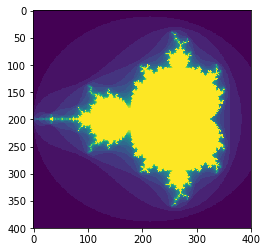

In [24]:
def mandelbrot( h,w, maxit=20 ):
    y,x = np.ogrid[ -1.4:1.4:h*1j, -2:0.8:w*1j ]
    c = x+y*1j
    z=c

    divtime = maxit + np.zeros(z.shape, dtype=int)
    print(divtime)

    for i in range(maxit):
        z=z**2+c
        diverge = z*np.conj(z) > 2**2 # who is diverging
        div_now = diverge & (divtime==maxit) # who is diverging now
        divtime[div_now] = i
        z[diverge] = 2

    print(divtime.shape)
    
    return divtime

plt.imshow(mandelbrot(400,400))
plt.show()

# Массив с разными типами переменных

In [25]:
#x = np.zeros(3, dtype='3int8, float32, (2,3)float64')
#print(x)

#x = np.zeros(3, dtype=('i4',[('r','u1'), ('g','u1'), ('b','u1'), ('a','u1')])) 
#print(x['r'])

#x = np.zeros(3, dtype=[('x','f4'),('y',np.float32),('value','f4',(2,2))])
#print(x)

#x = np.zeros(3, dtype={'col1':('i1',0,'title 1'), 'col2':('S10',1,'title 2')})
#print(x)
#x[0]['title 2']='asdsdfsdgsgdsgsdgsd'
#print(x[0]['title 2'])
#print(x)

recordarr = np.rec.array([(1,2.,'Hello'),(2,3.,"World")],
dtype=[('foo', 'i4'),('bar', 'f4'), ('baz', 'S10')])
print(recordarr.baz)

np.save("numpy03.txt",recordarr)
y=np.load("numpy03.txt")
print(y)

['Hello' 'World']
[(1, 2.0, 'Hello') (2, 3.0, 'World')]
